In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

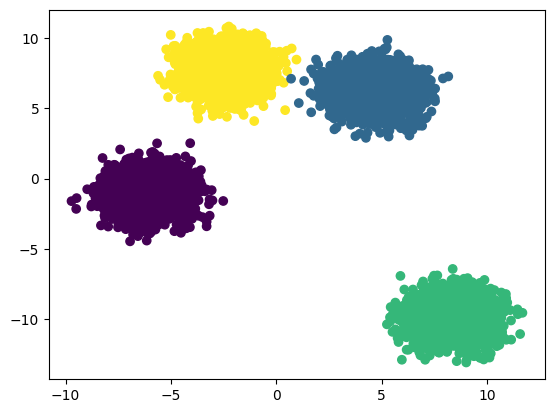

In [5]:
x,y = make_blobs(n_samples=10000, centers=4, n_features=3)
plt.scatter(x[:, 0], x[:, 1], c=y)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)
x_train.shape, y_train.shape

((7000, 3), (7000,))

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [12]:
wcss = []
for cluster in range(1, 16):
    kmeans = KMeans(n_clusters=cluster, init="k-means++")
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
wcss

[20999.999999999964,
 11586.852726721832,
 2630.307097362764,
 563.650082720051,
 529.1606737357868,
 494.7982226837106,
 472.1328071055751,
 435.12087948601675,
 414.4862883929693,
 384.24535249069703,
 366.8909805590577,
 363.9057637506188,
 323.58342890600113,
 323.5336943586672,
 303.9863442276469]

### WCSS value means Within Cluster Sum of Squares and it should be minimum as possible
### init = k-means++ means we are initializing the centroids with the k-means++ method in which all the centroids are initiated very far from the plot 

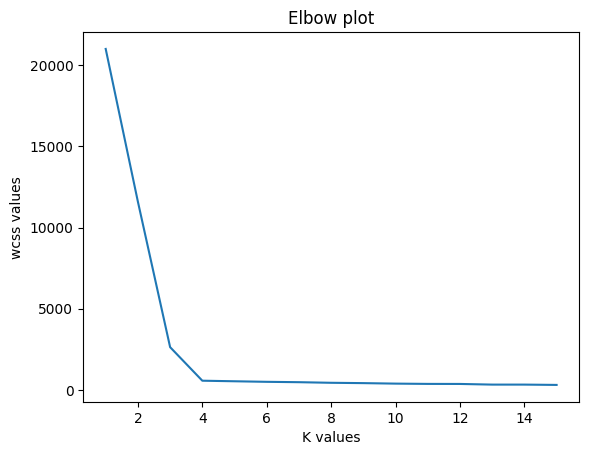

In [14]:
plt.plot(range(1, 16), wcss)
plt.xlabel("K values")
plt.ylabel("wcss values")
plt.title("Elbow plot")
plt.show()

### In an elbow plot, we basically have to observe that at what value of K, the value of wcss becomes stable after it 
### Here we can see it as 4

In [15]:
kmeans = KMeans(n_clusters=4, init= "k-means++")
kmeans.fit_predict(x_train)

array([3, 1, 2, ..., 3, 2, 0])

In [16]:
pred = kmeans.predict(x_test)

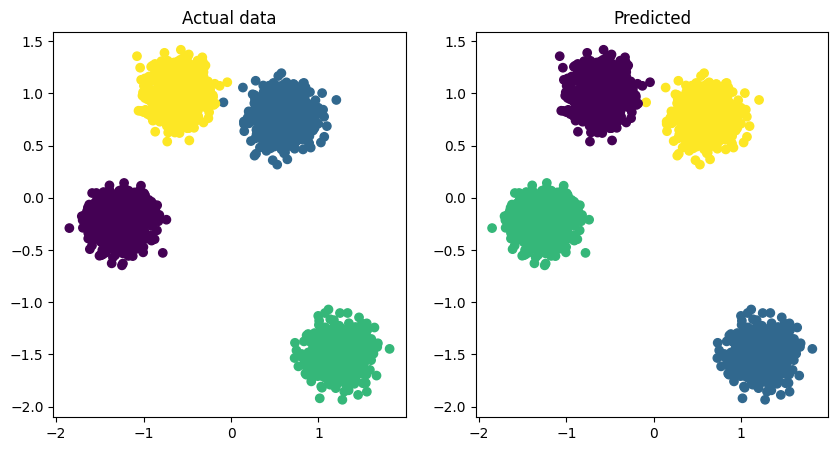

In [24]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.scatter(x_test[:, 0], x_test[:, 1], c = y_test)
plt.title("Actual data")
plt.subplot(1,2,2)
plt.scatter(x_test[:, 0], x_test[:, 1], c = pred)
plt.title("Predicted")
plt.show()

## For validating our selection of K value, we have 2 methods:-
### 1. Kneelocator
### 2. Silhoutte scoring

## Kneelocator

In [25]:
from kneed import KneeLocator

### Here in this we basically give it our elbow curve like in what range do we need our best k value, wcss values, curve will be convex by obsering graph of elbow curve and direction means the values are decreasing or increasing

In [26]:
kl = KneeLocator(range(1, 16), wcss, curve = 'convex', direction='decreasing')
kl.elbow

4

## Silhoutte score

In [27]:
from sklearn.metrics import silhouette_score

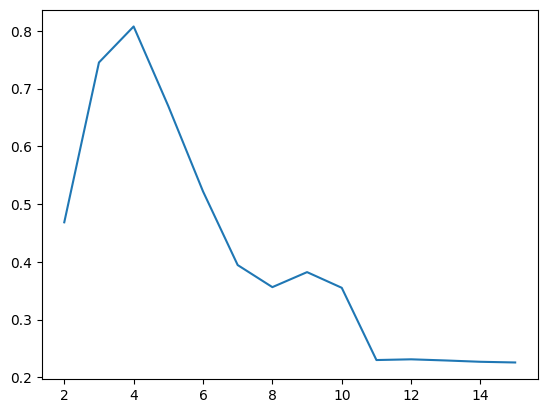

In [31]:
scores = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x_train)
    score = silhouette_score(x_train, kmeans.labels_)
    scores.append(score)

plt.plot(range(2,16), scores)

#### Here we have to select the k value which gives maximum score